In [1]:
# Initialization

import math
from datetime import datetime
import openpyxl as opxl
from openpyxl.utils.dataframe import dataframe_to_rows
import pandas as pd
import numpy as np
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.graph_objects as go

import sklearn.metrics
import scipy.integrate as integrate
import scipy.optimize as sco

import fluids as fds
import ht 

import general as gen
import model as ty
import proc as pr
import heat_transfer as bht
# importing sys
import sys
sys.path.insert(0,r'C:\Users\valen\Dropbox (DualSun)\PC\Documents\GitHub\RD-systems-and-test-benches\thermal')
import SK_standard as sk

In [32]:
input_name = r'\Inputs_V4.41-NI-glass-glass.xlsx'
hyp_name = r'\Model_hypotheses.xlsx'
data_path = r'G:\Drive partagés\BU04-Innovation\PVT-perf-1Dmodel\Steady-state conditions inputs'
data_name = r'\221223_TUV_test_conditions_V4.41GGA_MPP_flow2.xlsx'

par = pr.import_input(r'G:\Drive partagés\BU04-Innovation\PVT-perf-1Dmodel\Inputs',input_name)
hyp = pr.create_dict_from_excel(r'G:\Drive partagés\BU04-Innovation\PVT-perf-1Dmodel\Hypotheses',hyp_name,'Main')
condi = pr.create_inputs_from_excel(data_path+data_name,par,hyp)

{'exchanger': {'name': nan, 'eta_nom': 0.201, 'Eff_T': -0.0034000000000000002, 'T_ref': 298.15, 'Eff_G': 0, 'G_ref': 1000, 'X_corr': 1, 'tau_g': 0.8, 'alpha_g': 0.05, 'eps_PV': 0.9, 'eps_g': 0.9, 'eps_bs': 1, 'w_pan': 1.134, 'L_pan': 1.708, 'orientation': 'portrait', 'lambd_upper_glass': 0.002, 'lambd_upper_EVA': 0.000515, 'lambd_si': 0.00015, 'lambd_lower_EVA': 0.000515, 'lambd_PVDF': 0.0, 'lambd_PET': 0.0, 'lambd_adh': 0.0, 'lambd_lower_glass': 0.002, 'k_glass': 0.8, 'k_EVA': 0.24, 'k_si': 60, 'k_PVDF': 0.2, 'k_PET': 0.3, 'k_adh': 0.2, 'L_abs': 1.342, 'w_abs': 0.976, 'geometry': 'harp', 'N_harp': 300, 'N_meander': 1, 'L_tube': 1.342, 'tube_geometry': 'rectangular', 'H_tube': 0.002, 'w_tube': 0.00281, 'W': 0.00335, 'l_c': 0.003, 'p_ext_tube': 0.00335, 'p_ext_tube_rad': 0.00335, 'lambd_air': 0.0, 'lambd_conductive_plate': 0.0, 'lambd_abs': 0.00035, 'lambd_riser_plate': 0.0, 'lambd_riser_back': 0.00035, 'lambd_ins': 0.0, 'eps_hx_top': 0, 'eps_hx_back': 0.1, 'eps_ins': 0.2, 'k_air': 0.02

In [5]:
pr.disp_html(condi)

,G,T_amb,u,mdot,T_fluid_in,T_fluid_out,Tm,Tm - T_a,T*m,Qdot,eta g,u_back,-(Tm - T_a),Qdot / AG,-(Tm - T_a)^2,-up x (Tm - T_a),Gp,-dTm/dt,-up x G,-up x Gp,-(Tm - T_a)^4
0,0.0,273.15,1.0,0.002778,266.15,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
1,0.0,273.15,1.0,0.005556,266.15,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
2,0.0,273.15,1.0,0.008333,266.15,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
3,0.0,273.15,1.0,0.011111,266.15,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
4,0.0,273.15,1.0,0.013889,266.15,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
5,0.0,273.15,1.0,0.016667,266.15,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
6,0.0,273.15,1.0,0.027778,266.15,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
7,0.0,273.15,1.0,0.041667,266.15,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
8,0.0,273.15,1.0,0.055556,266.15,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
9,0.0,273.15,1.0,0.083333,266.15,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN


In [33]:
df_res,X,list_res = ty.simu_condi(par,hyp,condi)

top h simple theta<=45 Ra_L -265555991.96287608
top h simple theta<=45 Ra_L -2440435455.472592
top h simple theta<=45 Ra_L -3543972940.4469104
top h simple theta<=45 Ra_L -4208189373.273712
top h simple theta<=45 Ra_L -4651591150.907963
top h simple theta<=45 Ra_L -4968505308.956998
top h simple theta<=45 Ra_L -5206264305.8392725
top h simple theta<=45 Ra_L -5391215852.069082
top h simple theta<=45 Ra_L -5539187028.217711


In [35]:
ref = df_res.loc[df_res['Vdot']==200]["Qdot"].values[0]

In [36]:
df_res["power_reduction"] = (df_res["Qdot"]-ref)/ref

In [37]:
df_res["Vdot"]

0       10.0
1       20.0
2       30.0
3       40.0
4       50.0
5       60.0
6      100.0
7      150.0
8      200.0
9      300.0
10     400.0
11     500.0
12     600.0
13     700.0
14     800.0
15     900.0
16    1000.0
Name: Vdot, dtype: float64

Text(0, 0.5, 'Thermal power reduction (%)')

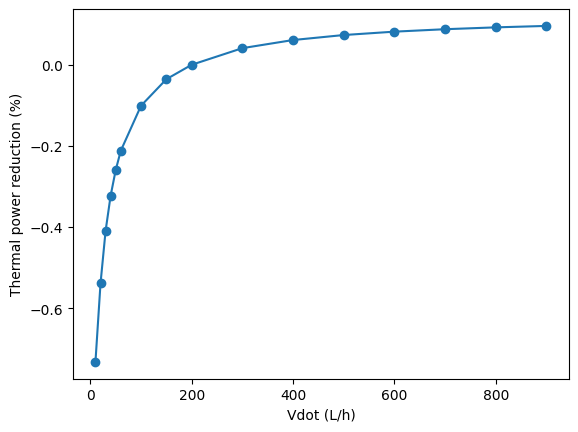

In [44]:
df_res['Vdot'] = df_res['mdot']*3600
df = df_res.loc[df_res['Vdot']<1000]
plt.plot(df['Vdot'],df["power_reduction"],'-o')
plt.xlabel('Vdot (L/h)')
# mets les valeurs de l'axe y en pourcentage
# fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
# yticks = mtick.FormatStrFormatter(fmt)
# plt.gca().yaxis.set_major_formatter(yticks)
plt.ylabel('Thermal power reduction (%)')

In [43]:
df[['Vdot','power_reduction']].to_csv('power_reduction.csv')

In [ ]:
par[]

In [ ]:
pr.disp_html(df_res)

Text(0, 0.5, 'Backside heat transfer coefficient (W/m2/K)')

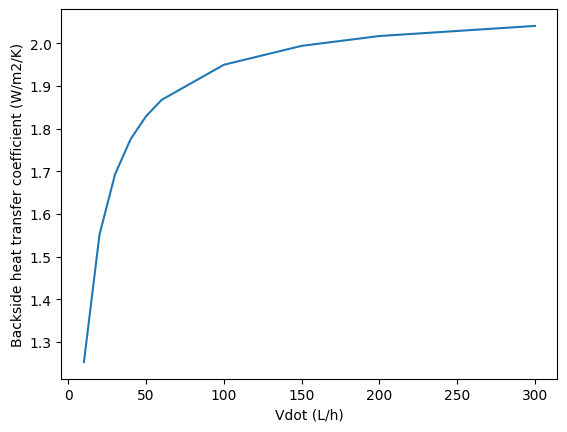

In [29]:
plt.plot(df['Vdot'],df['h_back'])
plt.xlabel('Vdot (L/h)')
plt.ylabel('Backside heat transfer coefficient (W/m2/K)')

In [ ]:
plt.plot(df_res['Vdot'],df_res['h_fluid'])

In [ ]:
df_res[['Vdot','h_fluid']]

In [ ]:
for i in range(len(df_res)):
    print(list_res[i]["exchanger"][0]["h_fluid"])

In [ ]:
df_res["T_fluid_in"]

In [30]:
yL = np.linspace(0.,par["exchanger"]["L_tube"],100)

Temp = pd.DataFrame(yL,columns=["y"])

for i in range(len(df_res)):
    a_f = list_res[i]["exchanger"][0]["a_f"]
    b_f = list_res[i]["exchanger"][0]["b_f"]
    T_fluid_in_i = df_res["T_fluid_in"][i]
    Temp[f"T_fluid_{i}"] = Temp.apply(lambda x : (T_fluid_in_i + b_f/a_f)*math.exp(a_f*x["y"]) - b_f/a_f,axis=1)

C:\Users\valen\AppData\Local\Temp\ipykernel_25240\665466931.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Temp[f"T_fluid_{i}"] = Temp.apply(lambda x : (T_fluid_in_i + b_f/a_f)*math.exp(a_f*x["y"]) - b_f/a_f,axis=1)
C:\Users\valen\AppData\Local\Temp\ipykernel_25240\665466931.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Temp[f"T_fluid_{i}"] = Temp.apply(lambda x : (T_fluid_in_i + b_f/a_f)*math.exp(a_f*x["y"]) - b_f/a_f,axis=1)
C:\Users\valen\AppData\Local\Temp\ipykernel_25240\665466931.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Temp[f"T_fluid_{i}"] = Temp.apply(lambda x : (T_fluid_in_i + b_f/a_f)*math.exp(a_f*x["y"]) - b_f/a_f,axis=1)
C:\Users\valen\AppData\Local\Temp\ipyker

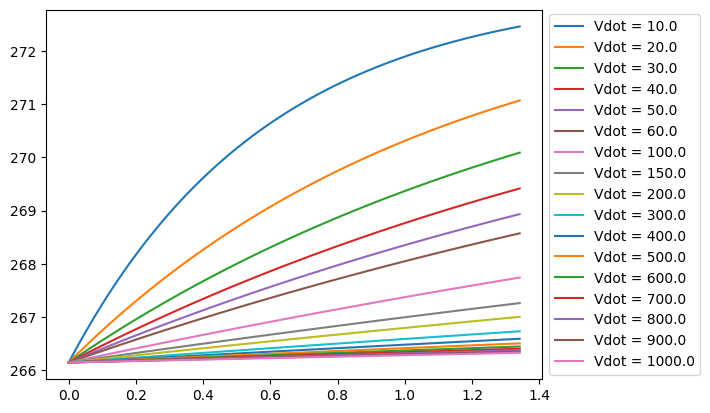

In [31]:
for i in range(len(df_res)):
    plt.plot(Temp["y"],Temp[f"T_fluid_{i}"],label = f"Vdot = {df_res['Vdot'][i]}")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
plt.plot(df_res['Vdot'],df_res['T_abs_mean'])

In [ ]:
8*df_res.loc[df_res['Vdot'] == 60]['Qdot'].values[0] + 2*df_res.loc[df_res['Vdot'] == 150]['Qdot'].values[0]

In [ ]:
1730/(10*1.93*7)

In [ ]:
10*df_res.loc[df_res['Vdot'] == 100]['Qdot'].values[0]

In [ ]:
1500/(10*1.93*7)

In [ ]:
8*30+2*300

In [ ]:
1000-240

In [ ]:
df_res["Vdot"]

In [ ]:
[tab,X] = sk.find_SK(condi,par['AG'],columns_list=[1,1,0,1,0,0,1,0,0])
X_df = pd.DataFrame(X[0],index = ['eta0,hem','a1','a2','a3','a4','a5','a6','a7','a8'],columns=['TÜV'])

[tab_m,X_m] = sk.find_SK(df_res,par['AG'],columns_list=[1,1,0,1,0,0,1,0,0])
X_df['Linear fit model 1D'] = X_m[0]

pr.disp_html(X_df)

# X_df.to_csv('V4.41_glass_backsheet_MPP.csv',sep=";")

In [ ]:
par["manifold"]["L_f0"]

In [ ]:
pr.disp_html(df_res)

In [ ]:
condi["dTm/dt"] = 0.

u_list = condi["u"].unique()
color_list_1 = ['lightgreen','skyblue','darksalmon']
color_list_2 = ['green','darkblue','tomato']

fig = go.Figure()

for i in range(len(u_list)):
    # Add traces

    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=df_res.loc[df_res["u"]==u_list[i]]['Qdot / AG'],
                        mode = 'markers',marker_color = color_list_1[i],
                        name='Model 1D - u = '+str(u_list[i])+' m/s',
                        ))

    
    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=sk.comp_power_rG_coeff_df(X_df['Linear fit model 1D'],df_res.loc[df_res["u"]==u_list[i]]),
                        mode = 'lines',
                        line=dict(color=color_list_1[i], width=1,
                            dash='dashdot'),
                        name='Linear fit model 1D - u = '+str(u_list[i])+' m/s',
                        ))
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['Tm - T_a'], y=condi.loc[condi["u"]==u_list[i]]['Qdot / AG'],
                        mode = 'markers',marker_color = color_list_2[i],
                        name='TUV - u = '+str(u_list[i])+' m/s')
                        )
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['Tm - T_a'], y=sk.comp_power_rG_coeff_df(X_df['TÜV'],condi.loc[condi["u"]==u_list[i]]),
                        mode = 'lines',
                        line=dict(color=color_list_2[i],width=1
                            ),
                        name='Linear fit TUV - u = '+str(u_list[i])+' m/s')
                        )
# Set x-axis title
fig.update_xaxes(title_text="T_m - T_amb")
fig.update_yaxes(title_text="Power related to gross (W/m2 coll.)")

fig.update_layout(
    title={
        'text': "V4.41 glass-backsheet dark no wind",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    autosize=False,
    width=1200,
    height=700,
    margin=dict(
        l=0,
        r=0,
        b=50,
        t=50,
        pad=1
    ),
)

fig.show()

In [ ]:
fig.write_html('V4.41_glass_backsheet_MPP.html')

In [ ]:
pr.disp_html(df_res)

In [ ]:
[tab,X] = sk.find_SK_SST(condi,par['A_G'],columns_list=[0,1,0,1,0,0,0,0,0])
[tab_m,X_m] = sk.find_SK_SST(df_res,par['A_G'],columns_list=[0,1,0,1,0,0,0,0,0])

In [ ]:
pr.display_a_i(X)
pr.display_a_i(X_m)

In [ ]:
condi

In [ ]:
pr.disp_html(df_res)

In [ ]:
u_list = [0.7,2.1,3.9]

color_list = ['blue','red','green','orange','cyan','purple']

def lin(x,a,b):
    return a*x+b

popt_mod_list = []
pcov_mod_list = []
popt_tuv_list = []
pcov_tuv_list = []


for i in range(len(u_list)):
    popt,pcov = sco.curve_fit(lin,-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'],df_res.loc[df_res["u"]==u_list[i]]['Q_dot / A_G'])
    popt_mod_list.append(popt)
    pcov_mod_list.append(pcov)

    popt,pcov = sco.curve_fit(lin,condi.loc[condi["u"]==u_list[i]]['T_m - T_a'],condi.loc[df_res["u"]==u_list[i]]['Q_dot / A_G'])
    popt_tuv_list.append(popt)
    pcov_tuv_list.append(pcov)

fig = go.Figure()

for i in range(len(u_list)):
    # Add traces

    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=df_res.loc[df_res["u"]==u_list[i]]['Q_dot / A_G'],
                        mode = 'markers',
                        marker=dict(color=color_list[2*i]),
                        name='Model 1D - u = '+str(u_list[i])+' m/s')
                        )
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['T_m - T_a'], y=condi.loc[condi["u"]==u_list[i]]['Q_dot / A_G'],
                        mode = 'markers',
                        marker=dict(color=color_list[2*i+1]),
                        name='TUV - u = '+str(u_list[i])+' m/s')
                        )


    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=lin(-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'],*popt_mod_list[i]),
                        mode = 'lines',
                        line=dict(color=color_list[2*i], width=1,
                              dash='dashdot'),
                        name='Linear fit model 1D - u = '+str(u_list[i])+' m/s')
                        )
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['T_m - T_a'], y=lin(condi.loc[condi["u"]==u_list[i]]['T_m - T_a'],*popt_tuv_list[i]),
                        mode = 'lines',
                        line=dict(color=color_list[2*i+1], width=1,
                              dash='dashdot'),
                        name='Linear fit TUV - u = '+str(u_list[i])+' m/s')
                        )
# Set x-axis title
fig.update_xaxes(title_text="T_m - T_amb")
fig.update_yaxes(title_text="Power related to gross (W/m2 coll.)")

fig.update_layout(
    title={
        'text': "V4.41 glass-backsheet dark no wind",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    autosize=False,
    width=1200,
    height=700,
    margin=dict(
        l=0,
        r=0,
        b=50,
        t=50,
        pad=1
    ),
)

fig.show()

In [ ]:
mse = sklearn.metrics.mean_squared_error(df_res['Q_dot / A_G'],condi['Q_dot / A_G'])
print(math.sqrt(mse))